# MTpy Example 10

## Phase Tensor Pseudosections

A pseudosection plot distance on the x-axis and period on the y-axis.  Phase tensor ellipses are plotted for each station at each period measured.  This provides a plot that is an proxy for structures at depth. The ellipses and induction vectors are plotted in map view, so up is North and to the right is East.  

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))
    mt_data = mc.to_mt_data()
    mt_data.utm_crs = 28353

23:11:16T07:18:31 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5
CPU times: user 7.92 s, sys: 181 ms, total: 8.1 s
Wall time: 8.88 s


## Plot Profile Phase Tensor Pseudosection

Lets cut an E-W profile since we know the strike is roughly N-S.   

In [3]:
%%time
profile_mt_data = mt_data.get_profile(129, -27, 134, -27, 8000)

CPU times: user 40.1 s, sys: 828 ms, total: 40.9 s
Wall time: 40.9 s


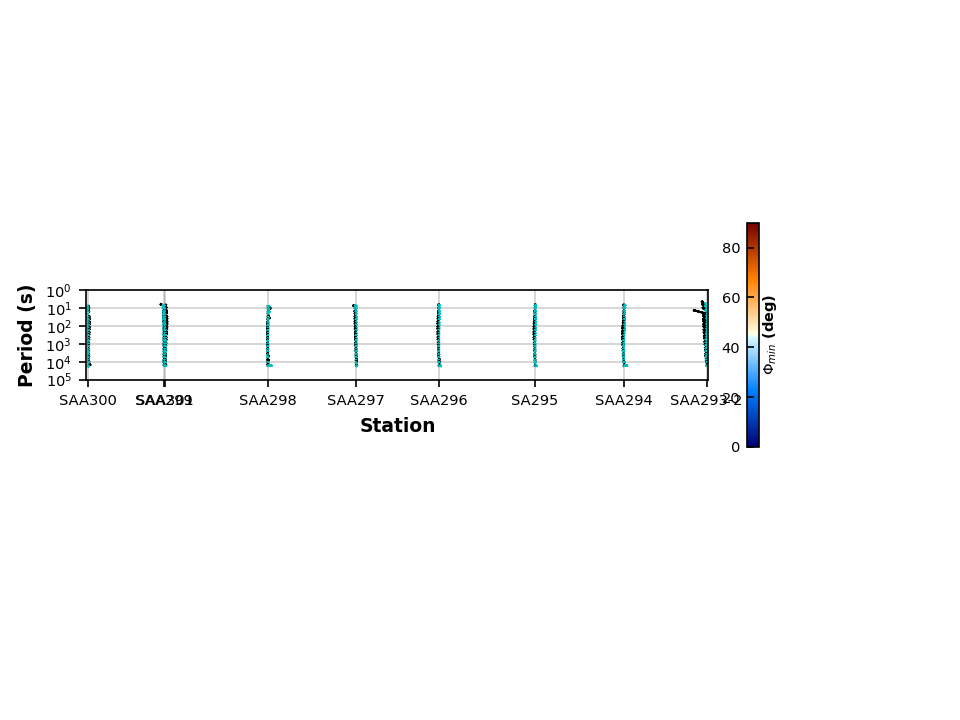

In [10]:
plot_pt_pseudosection = profile_mt_data.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    fig_num=2, 
    profile_reverse=False,
    y_limits=(10**5, 1),
)

### Adjust Plot Parameters

Adjust some plot parameters to make it look nice.

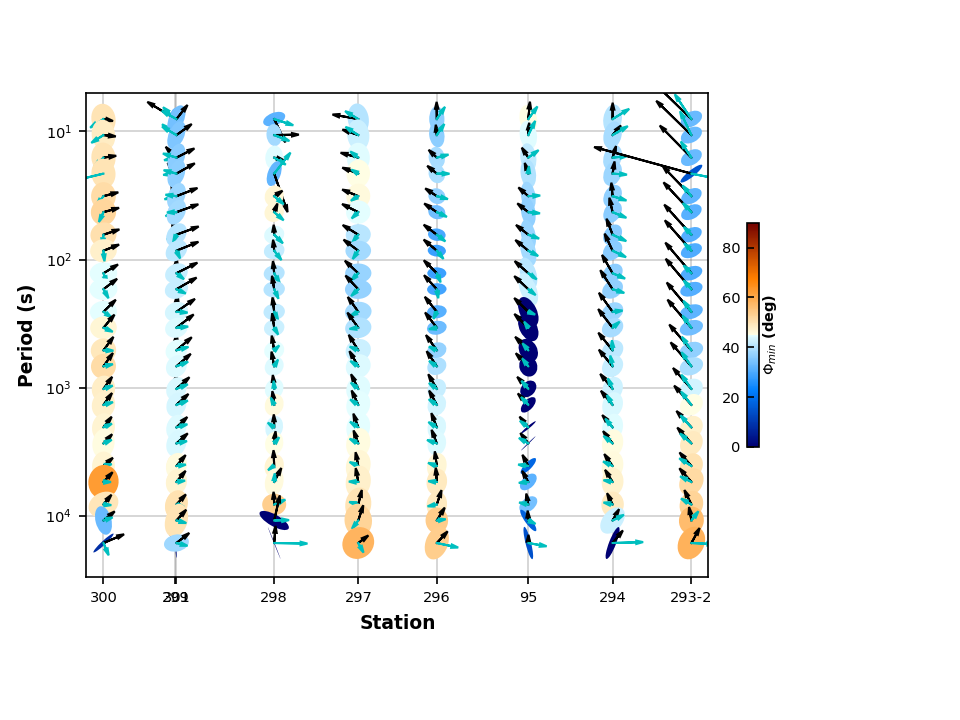

In [5]:
# the stretch in the y direction
plot_pt_pseudosection.x_stretch = .1

# the stretch in the y direction
plot_pt_pseudosection.y_stretch = 7500

# ellipse properties
plot_pt_pseudosection.ellipse_size = 2000

# arrow properties
plot_pt_pseudosection.arrow_lw = .5
plot_pt_pseudosection.arrow_size = 3000
plot_pt_pseudosection.arrow_head_width = 200 

# station name index
plot_pt_pseudosection.station_id = [3, None]

# y limits for the period range
plot_pt_pseudosection.y_limits=(30000, 5)

# need a new figure number from the main, otherwise it updates that plot
plot_pt_pseudosection.fig_num = 3
plot_pt_pseudosection.redraw_plot()

### Shallow Observations
  
Shallow here is between 1 - 50 seconds


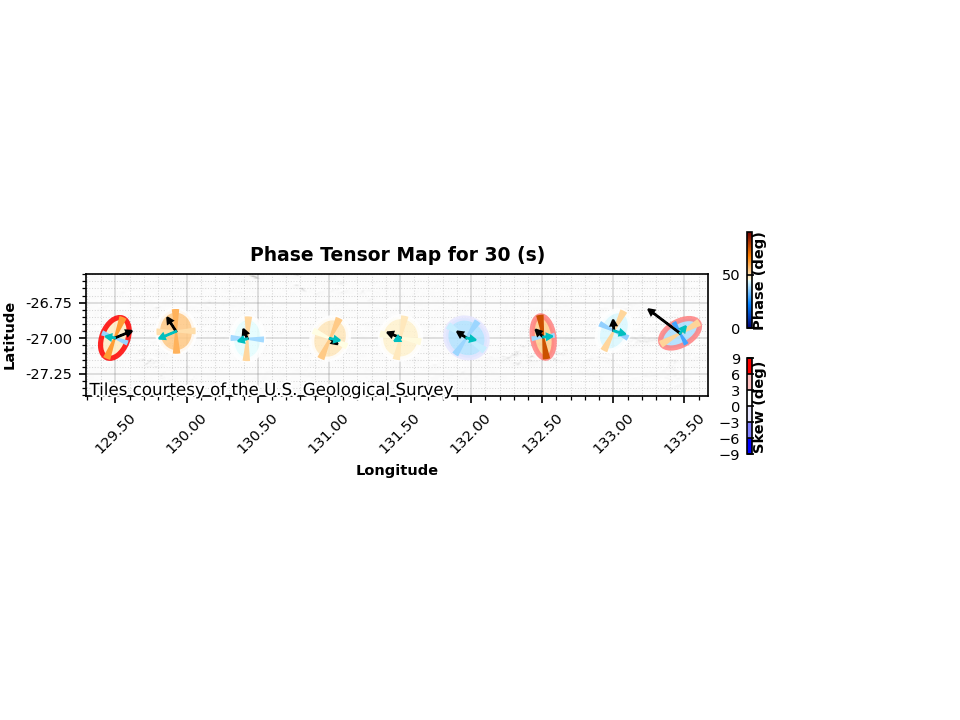

In [11]:
plot_stations = profile_mt_data.plot_phase_tensor_map(
    plot_tipper="yri", 
    plot_period=30, 
    fig_num=10,
    ellipse_size=.15,
    arrow_size=.30,
    arrow_head_width=.04,
    arrow_head_length=.04,
    arrow_lw=.005,
    x_pad=.2,
    y_pad=.4,
    
)

### Middle Observations
  
Shallow here is between 50 - 1000 seconds


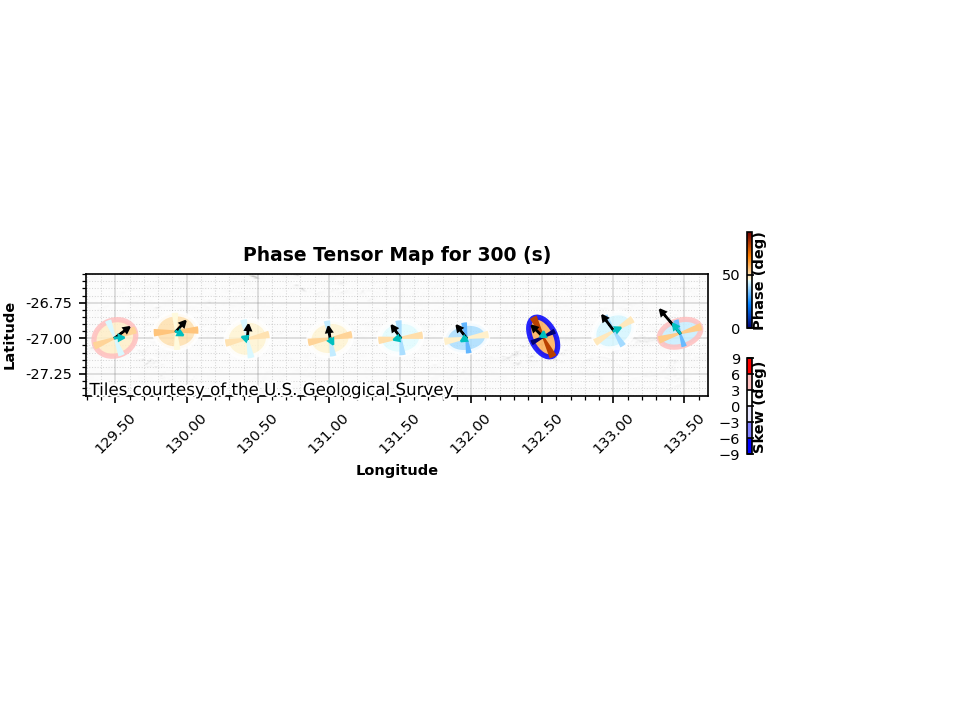

In [12]:
plot_stations.plot_period = 300
plot_stations.fig_num = 11
plot_stations.redraw_plot()

### Lower Observations
  
Shallow here is between 1000 - 30000 seconds

   - There appears to be a strong north trending conductive zone in the lower crust to upper mantle, as highlighted by the induction vectors.    

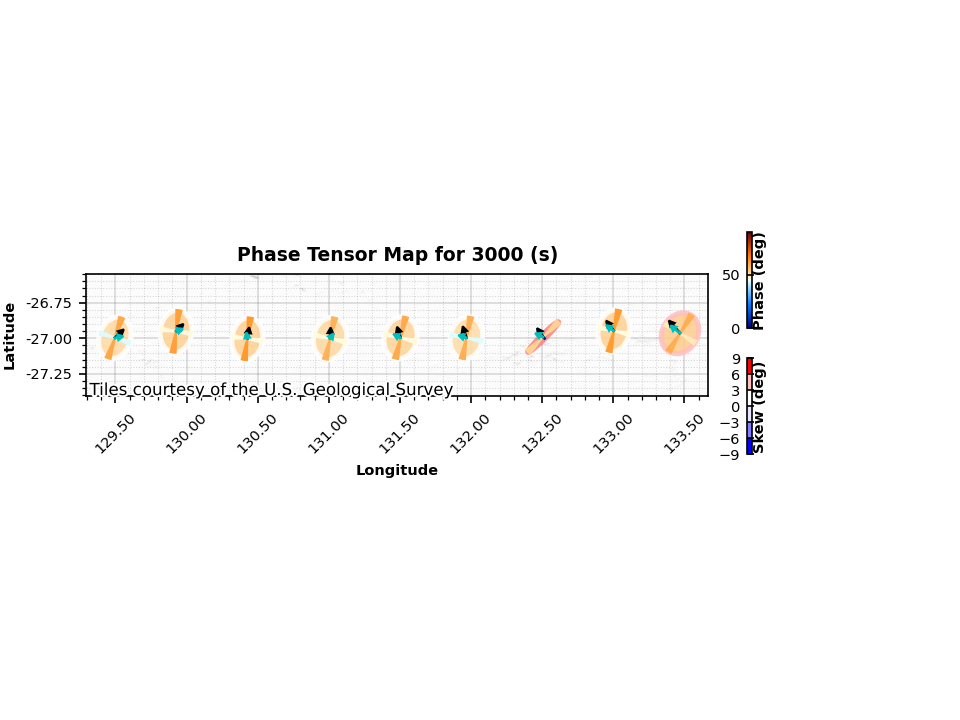

In [13]:
plot_stations.plot_period = 3000
plot_stations.fig_num = 12
plot_stations.redraw_plot()

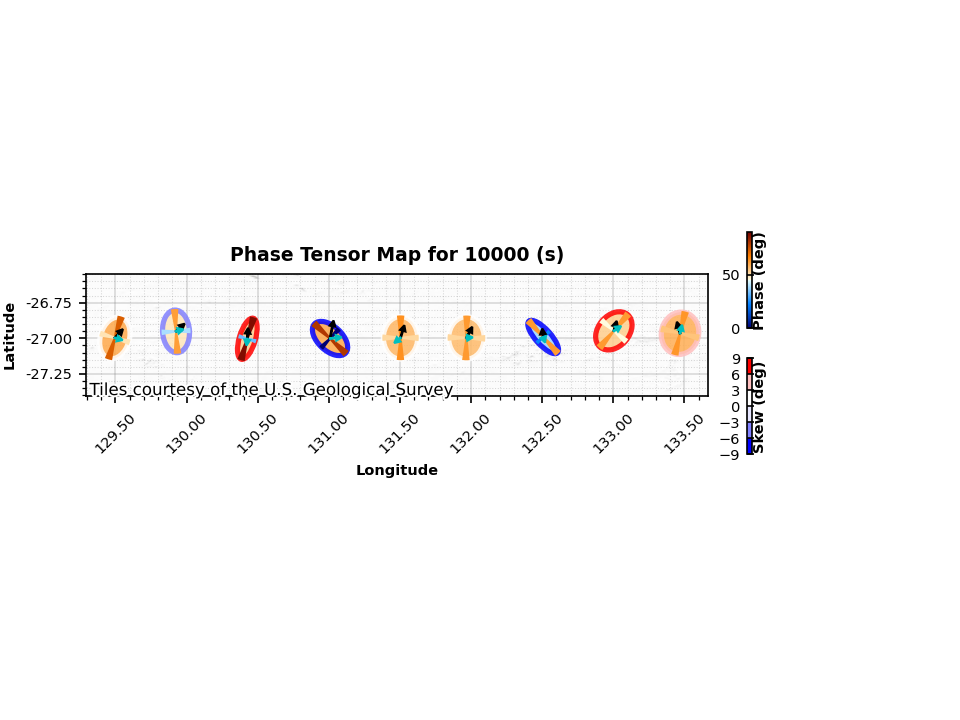

In [9]:
plot_stations.plot_period = 10000
plot_stations.fig_num = 13
plot_stations.redraw_plot()